In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import scipy.special as scsp

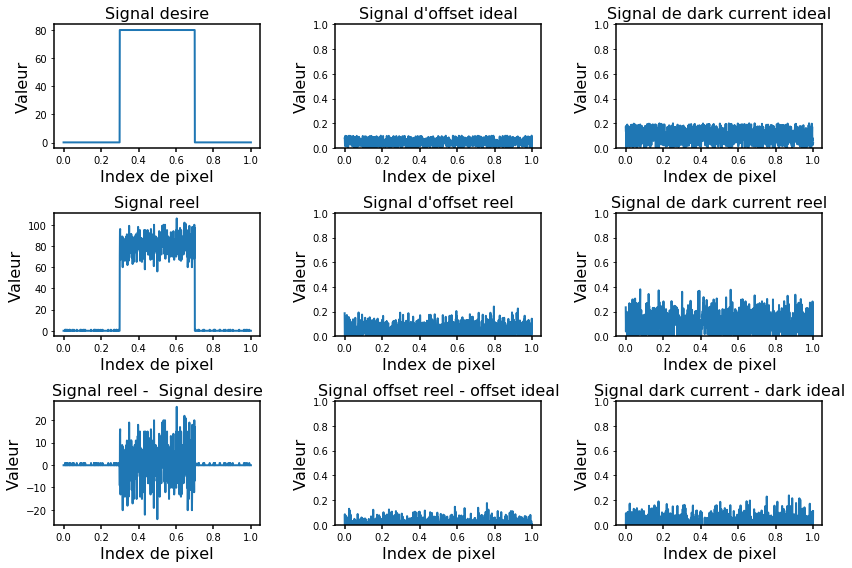

In [2]:
# define stuff for studying signal
_dtype = np.uint16
_dt = np.iinfo(_dtype)
_dynamic = _dt.max-_dt.min
_signal_limits = np.array([0.3, 0.7])
_sampling_freq = 1024
_time = np.linspace(0, 1, _sampling_freq)
_signal = np.where(np.logical_or(_time<_signal_limits[0], _time>_signal_limits[1]),0,1)
_offset = np.random.uniform(0, 0.1, len(_time))
_dark = np.random.uniform(0, 0.2, len(_time))

gauss = lambda std: np.random.normal(0, std, len(_time)) #mean, std, shape
signal_reel = 0.1+_signal*80
signal_poisson = np.random.poisson(signal_reel) #mean, std, shape
offset_bruite = _offset+gauss(0.05)
dark_bruite = _dark+gauss(0.08)

fig, ax = plt.subplots(3,3,figsize=(12,8))
ax[0,0].set_xlabel('Index de pixel')
ax[0,0].set_ylabel('Valeur')
ax[0,0].set_title('Signal desire')
ax[0,0].plot(_time, signal_reel )

ax[0,1].plot(_time, _offset)
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel('Index de pixel')
ax[0,1].set_ylabel('Valeur')
ax[0,1].set_title('Signal d\'offset ideal')

ax[0,2].plot(_time, _dark)
ax[0,2].set_ylim(0,1)
ax[0,2].set_xlabel('Index de pixel')
ax[0,2].set_ylabel('Valeur')
ax[0,2].set_title('Signal de dark current ideal')

# Noisy stuff here
ax[1,0].set_xlabel('Index de pixel')
ax[1,0].set_ylabel('Valeur')
ax[1,0].set_title('Signal reel')
ax[1,0].plot(_time, signal_poisson)

ax[1,1].plot(_time, offset_bruite)
ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel('Index de pixel')
ax[1,1].set_ylabel('Valeur')
ax[1,1].set_title('Signal d\'offset reel')

ax[1,2].plot(_time, dark_bruite)
ax[1,2].set_ylim(0,1)
ax[1,2].set_xlabel('Index de pixel')
ax[1,2].set_ylabel('Valeur')
ax[1,2].set_title('Signal de dark current reel')

# Difference stuff here
ax[2,0].set_xlabel('Index de pixel')
ax[2,0].set_ylabel('Valeur')
ax[2,0].set_title('Signal reel -  Signal desire')
ax[2,0].plot(_time, signal_poisson-signal_reel)

ax[2,1].plot(_time, _offset - offset_bruite)
ax[2,1].set_ylim(0,1)
ax[2,1].set_xlabel('Index de pixel')
ax[2,1].set_ylabel('Valeur')
ax[2,1].set_title('Signal offset reel - offset ideal')

ax[2,2].plot(_time, _dark - dark_bruite)
ax[2,2].set_ylim(0,1)
ax[2,2].set_xlabel('Index de pixel')
ax[2,2].set_ylabel('Valeur')
ax[2,2].set_title('Signal dark current - dark ideal')
fig.tight_layout()

# Quelques definitions
* Signal:
Composante deterministe d'un processus mesurable / quantifiable

* Bruit:
Composante aleatoire d'un processus mesurable /quantifiable. Exemple: Bruit gaussien, bruit poissonien

\begin{align}
pdf(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{(x-\mu)^2}{2\pi\sigma^2}} \\
\end{align}

\begin{align}
P(x=k, \lambda) = \frac{\lambda^{k}e^{-\lambda}}{k!} \\
pdf(x, \lambda) &= \frac{\lambda^{x} e^{-\lambda}}{\Gamma(x+1)}
\end{align}


* Quantification / Echantillonage / Numerisation (digitalization)
voir schema

* Rapport signal a bruit
\begin{align}
10 \times log_{10} \left( \frac{d^2}{EQM} \right) \\
10 \times log_{10} \left( \frac{2^{2\times dyn}}{\mathbb{E}((x-\mathbb{E}(x))^2)} \right)
\end{align}

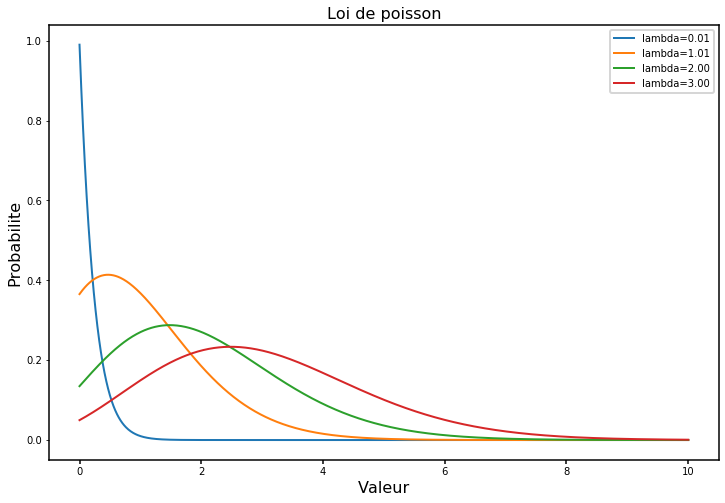

In [3]:
#Extend Poisson distribution to real cases
def Poisson2(lambdaParam,x):
    return (np.power(lambdaParam,x)*np.exp(-lambdaParam))/scsp.gamma(x+1)

time = np.linspace(0,10, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi de poisson')
for lam in np.linspace(1e-2,3,4):
    ax.plot(time, Poisson2(lam, time), label='lambda={:.2f}'.format(lam))
ax.legend()

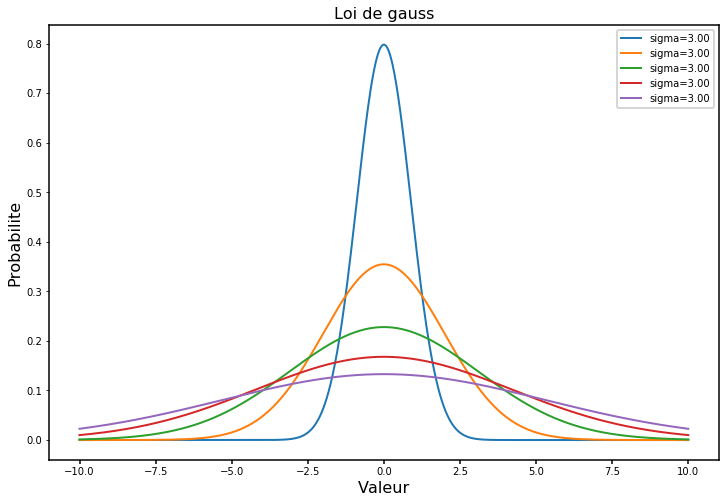

In [4]:
def Gaussian(mu, sigma, x):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x-mu)/(np.sqrt(2*np.pi)*sigma))**2)

time = np.linspace(-10,10, 1024)
fig, ax = plt.subplots(1,figsize=(12,8))
ax.set_xlabel('Valeur')
ax.set_ylabel('Probabilite')
ax.set_title('Loi de gauss')
for sigma in np.linspace(5e-1,3,5):
    ax.plot(time, Gaussian(0, sigma, time), label='sigma={:.2f}'.format(lam))
ax.legend()

In [5]:
def psnr(signal, reference):
    # First, check type
    #assert(reference.dtype==np.uint16)
    #t = np.iinfo(reference.dtype)
    t=_dt
    var = np.mean((signal-reference)**2)
    psnr = ((t.max-t.min)**2) / var
    psnr = 10*np.log10(psnr)
    return psnr

# Exemple de rapport signal / bruit


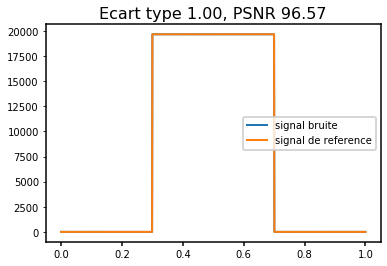

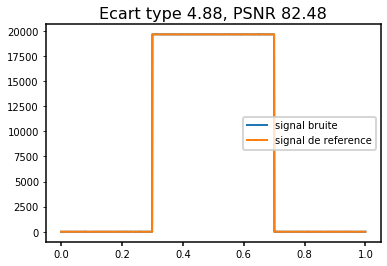

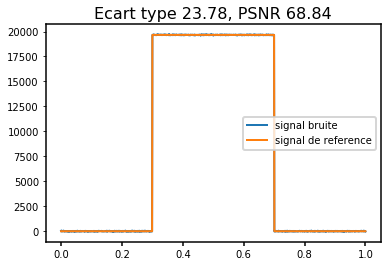

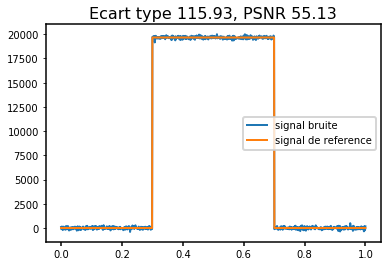

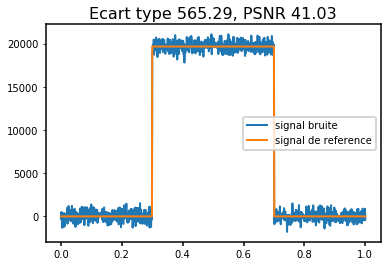

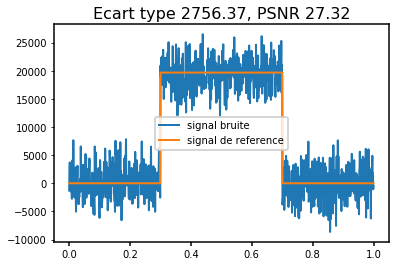

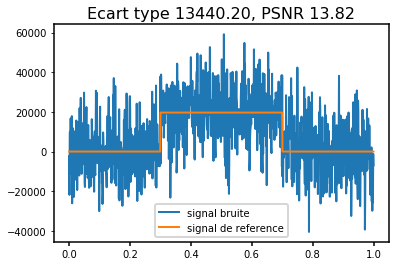

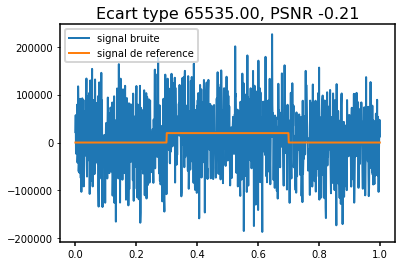

In [6]:
signal = _signal*0.30*_dynamic+0.02*_offset
for std in np.logspace(np.log10(1), np.log10(_dynamic), 8):
    noise = np.random.normal(0, std, len(_time))
    res = signal + noise
    fig, ax = plt.subplots(1)
    ax.set_title('Ecart type {:.2f}, PSNR {:.2f}'.format(std, psnr(res, signal)))
    ax.plot(_time, res, label='signal bruite')
    ax.plot(_time, signal, label='signal de reference')
    ax.legend()

# PSNR et compositage


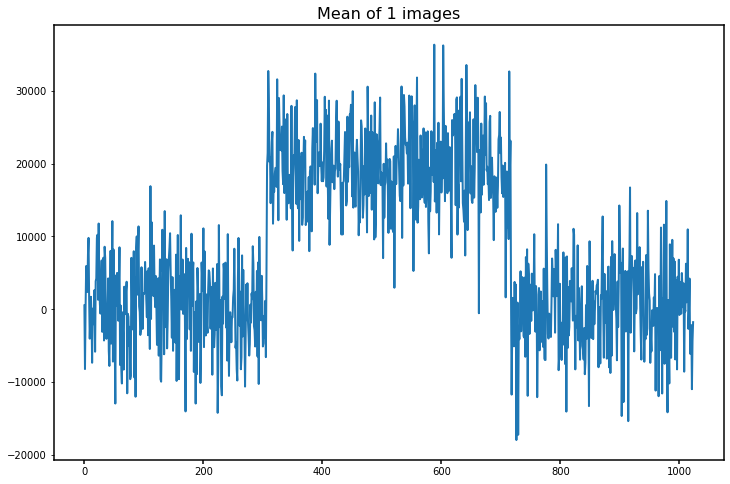

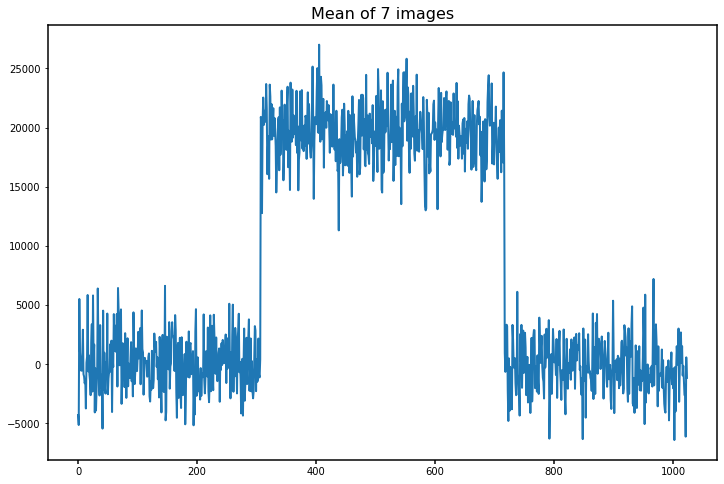

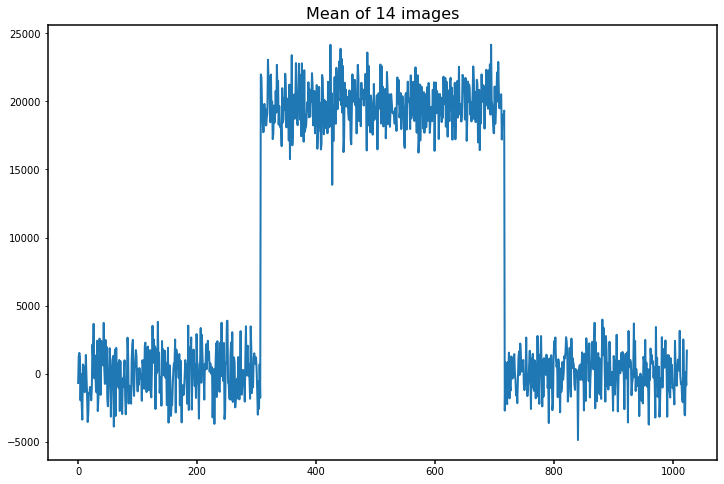

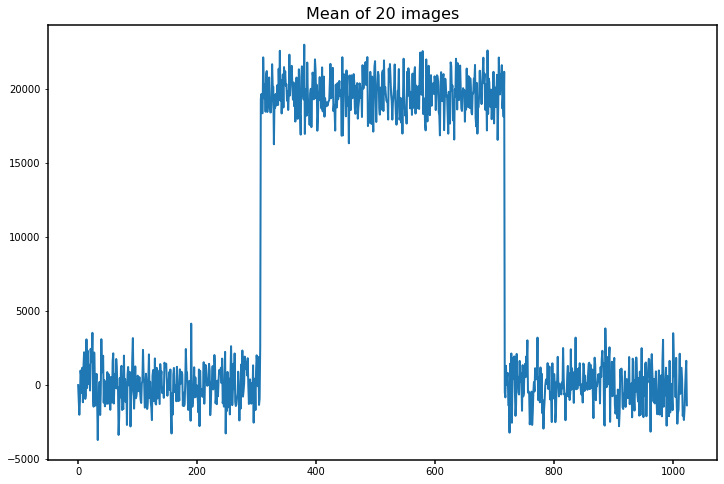

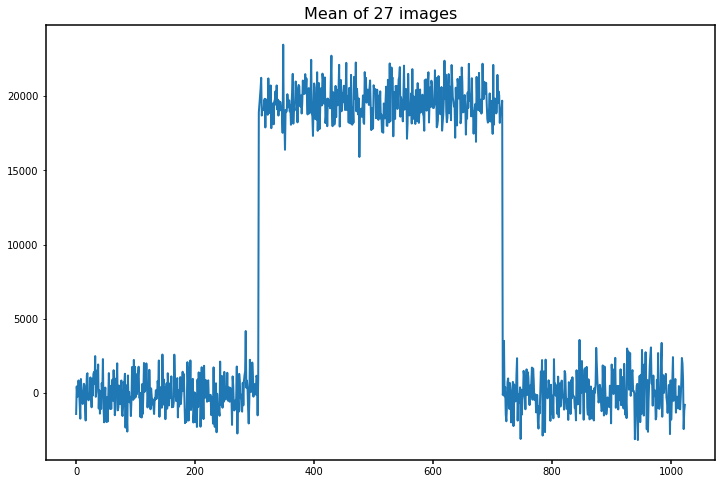

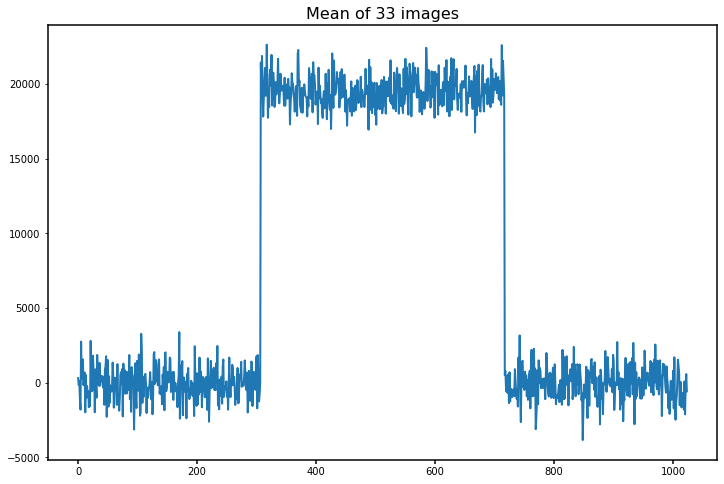

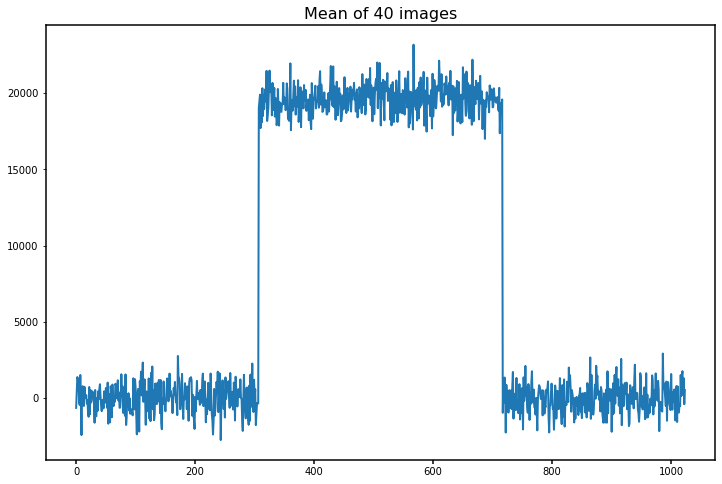

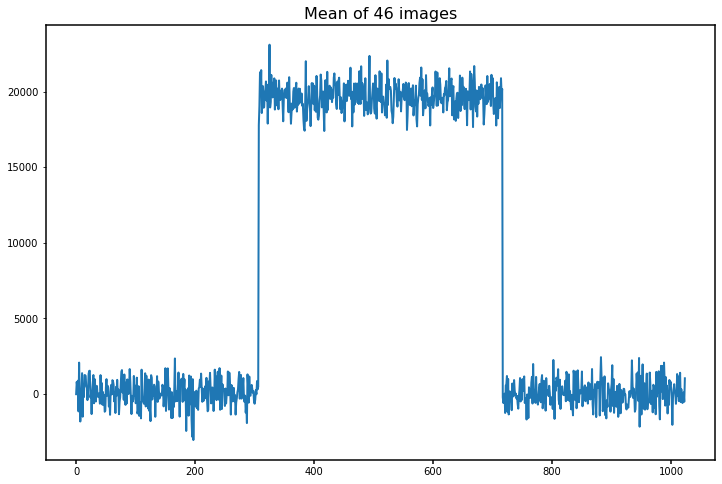

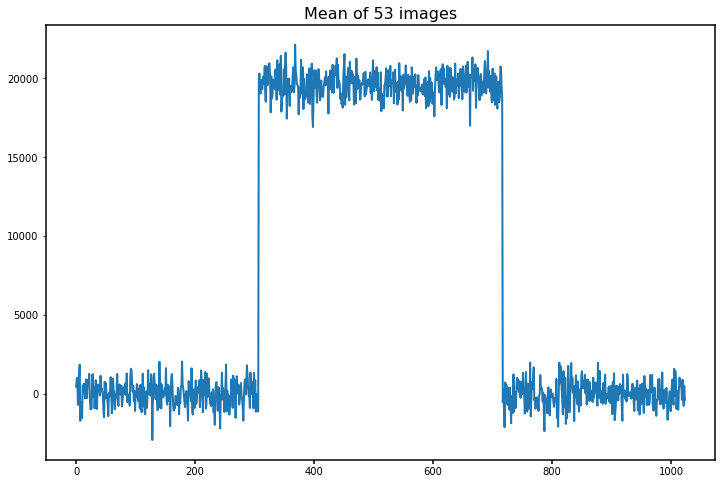

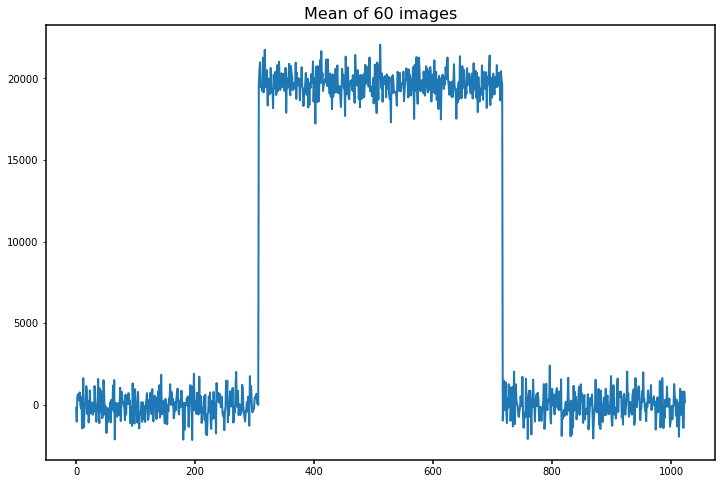

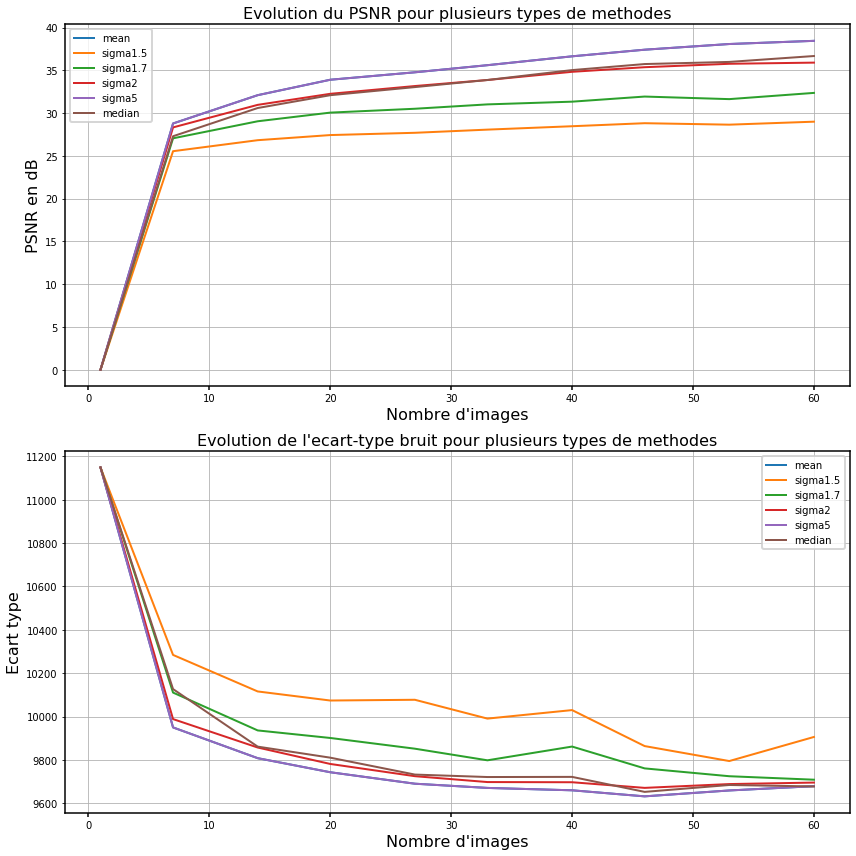

In [38]:
def composite(stack):
    d = {}
    d["mean"] = np.mean(stack, axis=0)
    d["sigma1.5"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=1.5, high=1.5)[0]) for i in range(stack.shape[1])])
    d["sigma1.7"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=1.7, high=1.7)[0]) for i in range(stack.shape[1])])
    d["sigma2"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=2.0, high=2.0)[0]) for i in range(stack.shape[1])])
    #d["sigma3"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=3.0, high=3.0)[0]) for i in range(stack.shape[1])])
    #d["sigma4"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=4.0, high=4.0)[0]) for i in range(stack.shape[1])])
    d["sigma5"] = np.array([np.mean(scs.sigmaclip(stack[:,i], low=5.0, high=5.0)[0]) for i in range(stack.shape[1])])
    d["median"] = np.median(stack, axis=0)
    return d
                           
signal = _signal*0.30*_dynamic+0.02*_offset
std = 6000
nb_images = np.linspace(1, 60, 10).astype(np.int32)
resultpsnr = {}
resultstd = {}
for nb_image in nb_images:
    stack = np.zeros((nb_image, len(_time)))
    for instance in range(nb_image):
        stack[instance,:] = signal+np.random.normal(0, std, len(_time))
    res = composite(stack)
    if nb_image%1 ==0:
        #print('shape is {}'.format(res['mean'].shape))
        fig, ax = plt.subplots(1,figsize=(12,8))
        ax.set_title('Mean of {} images'.format(nb_image))
        #ax.plot(signal)
        ax.plot(res['mean'])
    for key, val in res.items():
        if key in resultpsnr:
            resultpsnr[key].append(psnr(val, signal))
            resultstd[key].append(np.std(val))
        else:
            resultpsnr[key]=[0] #[psnr(val, np.zeros_like(val))]
            resultstd[key]=[np.std(val)]
    
fig, ax = plt.subplots(2,figsize=(12,12))
for (key, psnr_val), (key, std_val) in zip(resultpsnr.items(), resultstd.items()):
    ax[0].plot(nb_images, psnr_val, label=key)
    ax[1].plot(nb_images, std_val, label=key)

ax[0].set_title('Evolution du PSNR pour plusieurs types de methodes')
ax[0].set_xlabel('Nombre d\'images')
ax[0].set_ylabel('PSNR en dB')
ax[0].grid()
ax[0].legend()

ax[1].set_title('Evolution de l\'ecart-type bruit pour plusieurs types de methodes')
ax[1].set_xlabel('Nombre d\'images')
ax[1].set_ylabel('Ecart type')
ax[1].grid()
ax[1].legend()
fig.tight_layout()